In [1]:
import logging
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


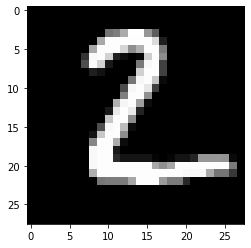

2


In [8]:
#display block

first_image = x_test[1]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print (y_test[1])

In [28]:
# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=[28,28]),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='sigmoid'),
  tf.keras.layers.Dense(16, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
             )
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 16)                12560     
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [29]:
#train model

history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test),
)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.7557 - sparse_categorical_accuracy: 0.5095 - val_loss: 1.2756 - val_sparse_categorical_accuracy: 0.7178
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 1.0410 - sparse_categorical_accuracy: 0.7606 - val_loss: 0.8686 - val_sparse_categorical_accuracy: 0.7825
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.7552 - sparse_categorical_accuracy: 0.8106 - val_loss: 0.6764 - val_sparse_categorical_accuracy: 0.8144
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6012 - sparse_categorical_accuracy: 0.8386 - val_loss: 0.5898 - val_sparse_categorical_accuracy: 0.8312
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5403 - sparse_categorical_accuracy: 0.8502 - val_loss: 0.5274 - val_sparse_categorical_accuracy: 0.8417
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4885 - sparse_categorica

In [ ]:
model.evaluate(x_test, y_test)